<a href="https://colab.research.google.com/github/niteshkumar0205/sparks-foundation-internship/blob/main/Task_2_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Iris dataset 

#Intern name : Niteshkumar G
#Task 2: Preditcton using unsupervised ml 
#Problem Statement :From the given iris dataset, predict the optimum number of clusters and represent it visually .


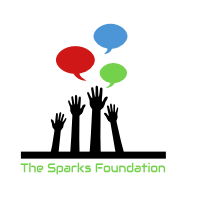


In [7]:
#importing the libraries
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
import seaborn as sns

In [8]:
#dataset 

data = load_iris()

In [10]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
ind = data.data
print(ind[:5])
print("rows and columns", ind.shape)
print("rows:",ind.shape[0])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
rows and columns (150, 4)
rows: 150


#FINDING THE BEST K VALUE

In [16]:
k = range(1,10)
distortions = []
for num in k:
    km=KMeans(n_clusters=num).fit(ind)
    distortions.append(sum(np.min(cdist(ind,km.cluster_centers_,'euclidean'),axis=1)))

#ELBOW PLOT / SCREE PLOT TO FIND THE OPTIMAL K

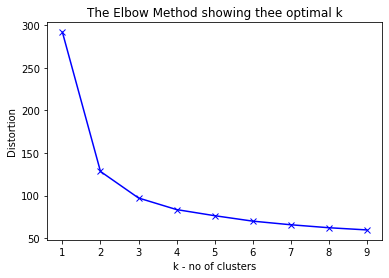

In [17]:
plt.plot(k,distortions,'bx-')
plt.xlabel('k - no of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing thee optimal k')
plt.show()

As u see above the number of clusters is 3 

In [18]:
m = KMeans(n_clusters=3).fit(ind)
print(set(km.labels_))
centroids = (km.cluster_centers_)
print(km.labels_)
print('the number of rows is :',len(km.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, 8}
[8 1 1 1 8 5 1 8 1 1 5 8 1 1 5 5 5 8 5 8 8 8 1 8 8 1 8 8 8 1 1 8 5 5 1 1 8
 8 1 8 8 1 1 8 8 1 8 1 8 8 6 6 6 4 6 2 6 4 6 4 4 2 2 6 4 6 2 2 2 4 3 2 3 6
 6 6 6 6 2 4 4 4 2 3 2 6 6 2 2 2 2 6 2 4 2 2 2 6 4 2 7 3 0 7 7 0 2 0 7 0 7
 3 7 3 3 7 7 0 0 3 7 3 0 3 7 0 3 3 7 0 0 0 7 3 3 0 7 7 3 7 7 7 3 7 7 7 3 7
 7 3]
the number of rows is : 150


#ASSIGNING THE NEWLY FOUND CENTROIDS TO A NEW COLUMN

In [20]:
df = pd.DataFrame(ind,columns = data.feature_names)
df['centroids'] = km.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),centroids
0,5.1,3.5,1.4,0.2,8
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,8


#LETS SEE HOW THE CENTROIDS FOUND USING K MEANS LOOK LIKE

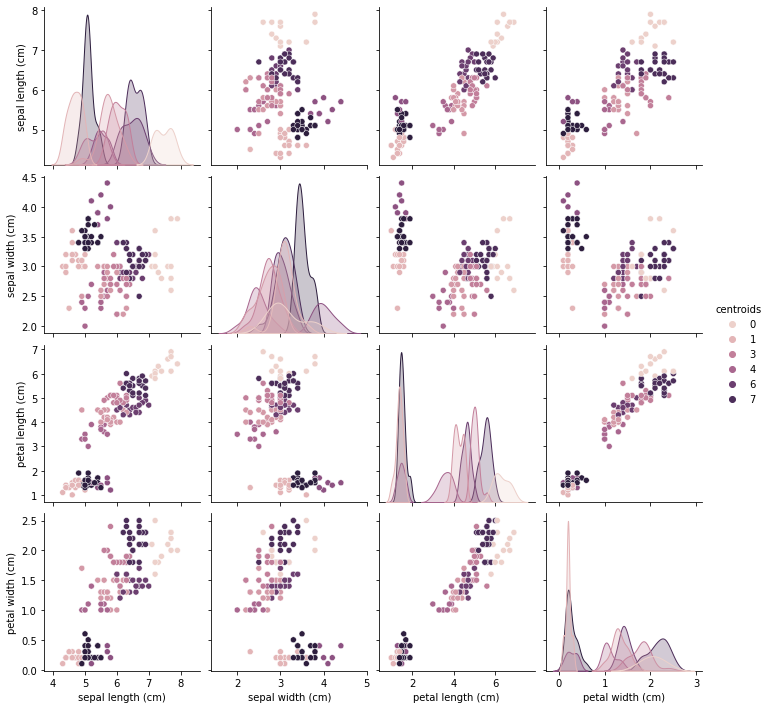

In [21]:
sns.pairplot(df, hue ='centroids')
sns.color_palette("YlOrBr", as_cmap=True)

#CREATING A COLUMN WITH ACTUAL/CORRECT LABELS LET US COMPARE THEM WITH THE CLUSTERS FOUND IN K MEANS ALGORITHM

In [22]:
df['labels'] = data.target
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'centroids', 'labels'],
      dtype='object')


#Plotting using the actual labels. Lets compare both plots and see if its similar.

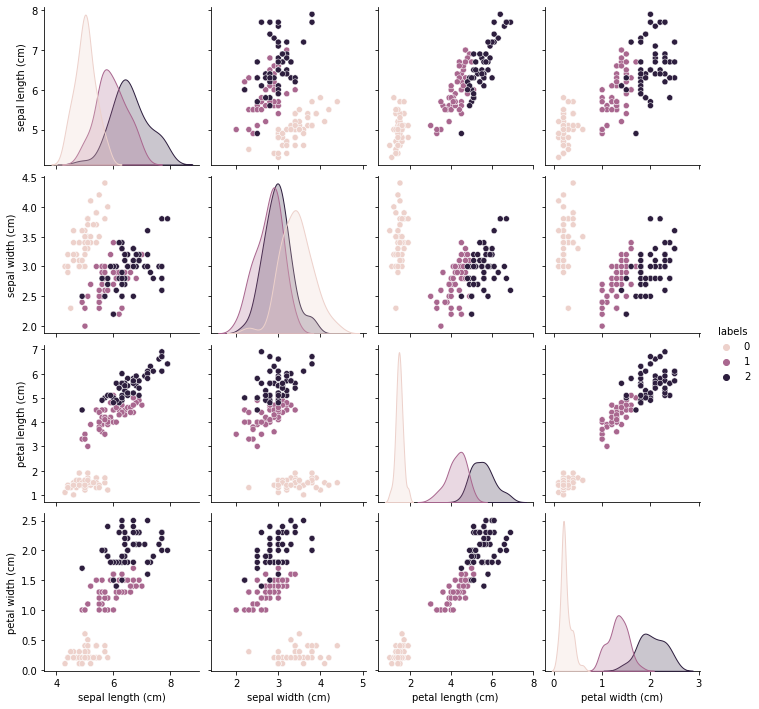

In [23]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)','labels']
sns.pairplot(df[cols], hue = 'labels')

#THANKYOU FOR THIS WONDEREFUL OPPURTUNITY THE SPARKS FOUNDATION.


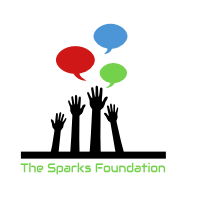